In [1]:
import numpy as np
import imageio
import torch
from torchvision import transforms
import plotter as pltr
pltr.set_backend(pltr.MatplotlibBackend)

In [2]:
def show(title, img):
    """
    Utility function to plot an image
    """
    frame = pltr.Frame()
    chart = frame.create_chart()
    white_font = pltr.Font(color=pltr.Color(red=255, green=255, blue=255), size=14)
    chart.title = title
    chart.title_font = white_font
    chart.show_axes = False
    if len(img.shape) == 2:
        # This is a grayscale image
        imgplot = pltr.GrayscaleImage(img)
    else:
        imgplot = pltr.RgbImage(img)
    chart.add(imgplot)
    frame.show()

In [3]:
# Load the image that we'll use to demonstrate the various transforms
img = imageio.imread('python_small.png')
type(img)

imageio.core.util.Image

### ToTensor()
[Doc](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=totensor#torchvision.transforms.ToTensor)

Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].

(256, 256, 4)
0 255
0 255
0 255
0 255


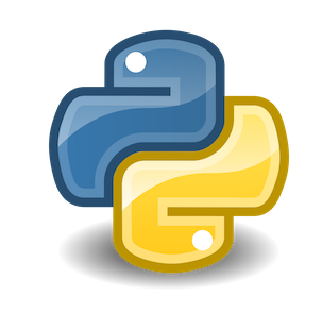

In [4]:
# This image has 4 channels, Red, Green, Blue, and Alpha.
# In a PIL image, the channels are last
# Each pixel in each of the channel is between 0 and 255
print(img.shape)
for channel in range(img.shape[-1]):
    print(np.min(img[:, :, channel]), np.max(img[:, :, channel]))
show('Python', img)

In [11]:
# But pytorch likes channels first. ToTensor transform does that transform.
# And while it is at it, it also normalizes the values to be between 0 and 1
to_tensor = transforms.ToTensor()
img2 = to_tensor(img)
print(img2.size())
for channel in range(img2.size()[0]):
    print(torch.min(img2[channel]), torch.max(img2[channel]))

torch.Size([4, 256, 256])
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


### Normalize()
[Doc](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize)

Normalize a tensor image with mean and standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e.

Contrary to what I'd expect, this function does not calculate the means and standard deviations of the input image and normalizes it. This function is much more general purpose than that (which is why it is not called "StandardNormalize" or some such). Here I have to provide the means and standard deviations. If I want to standard normalize my image, I have to fist calculate the means and std devs and provide those to this function.
```
input[channel] = (input[channel] - mean[channel]) / std[channel]
```

In [12]:
# Lets normalize img2 to have a mean of 0 and a standard deviation of 1 for each of the channels
# But based on the notes above, lets first calculate the mean and std devs for each channel.
mean_red = torch.mean(img2[0])
stddev_red = torch.std(img2[0])

mean_green = torch.mean(img2[1])
stddev_green = torch.std(img2[1])

mean_blue = torch.mean(img2[2])
stddev_blue = torch.std(img2[2])

mean_alpha = torch.mean(img2[3])
stddev_alpha = torch.std(img2[3])

# The extra params - the 0.5s at the end - will just be ignored
# This is useful when I don't know the number of channels in my image beforehand.
normalize = transforms.Normalize((mean_red, mean_green, mean_blue, mean_alpha, 0.5, 0.5),
                             (stddev_red, stddev_green, stddev_blue, stddev_alpha, 0.5, 0.5))

print('\nBefore transform')
for channel in range(img2.size()[0]):
    minval = torch.min(img2[channel])
    maxval = torch.max(img2[channel])
    print(minval, maxval)

nimg = normalize(img2)
print(nimg.size())  # The shape of the image does not change
for channel in range(nimg.size()[0]):
    minval = torch.min(nimg[channel])
    maxval = torch.max(nimg[channel])
    print(minval, maxval)
    
print('\nProof that transforms mutates the original tensor!!!')
for channel in range(img2.size()[0]):
    minval = torch.min(img2[channel])
    maxval = torch.max(img2[channel])
    print(minval, maxval)
    


Before transform
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
torch.Size([4, 256, 256])
tensor(-0.8491) tensor(1.6904)
tensor(-0.9942) tensor(1.8516)
tensor(-0.8525) tensor(2.4025)
tensor(-1.1699) tensor(0.9163)

Proof that transforms mutates the original tensor!!!
tensor(-0.8491) tensor(1.6904)
tensor(-0.9942) tensor(1.8516)
tensor(-0.8525) tensor(2.4025)
tensor(-1.1699) tensor(0.9163)


## RandomResizedCrop
[Doc](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=randomresizedcrop#torchvision.transforms.RandomResizedCrop)
Randomly crops the image using an arbitrary crop rectangle of size that is 0.8 to 1.0 of the original size. It also messes with the aspect ration of the cropped rectangle. It eventually resizes the cropped image to the size specified.

This transform only works on PIL images, so it is important to first apply the `ToPILImage` transform before applying this transform. Its output is also a PIL image. In order to view it, it is important to convert it back to `numpy` array.

Run the below cell a number of times to see the Python image being randomly cropped and resized.

(256, 256, 4)


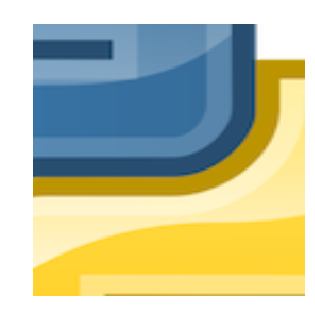

In [23]:
pillify = transforms.ToPILImage()
pil_img = pillify(img)
rand_resize_crop = transforms.RandomResizedCrop(256)
pil_img2 = rand_resize_crop(pil_img)
img2 = np.array(pil_img2)
print(img2.shape)
show('Resized', img2)

## RandomHorizontalFlip
[Doc]()
What it says on the tin. This transform operates on PIL images and outputs PIL images. It is important to first run the ImageIO image through the PIL transform and then convert it back to numpy format.

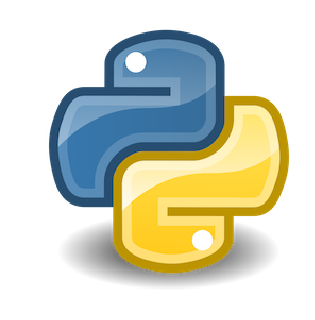

In [33]:
pillify = transforms.ToPILImage()
flip = transforms.RandomHorizontalFlip()
pil_img = pillify(img)
pil_img2 = flip(pil_img)
img2 = np.array(pil_img2)
show('Flipped', img2)